In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold

/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
data = pd.read_csv("./Preprocessing/Data_Structures/FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED.csv")

data.head()
y = data.Label
X = data.drop("Label", axis = 1)
print y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

2    7255
0    4518
1    3994
Name: Label, dtype: int64


In [52]:
def get_xgb_params():
    params = {}
    params['objective'] = 'multi:softmax'
    params['silent'] = 0
        
    #params['learning_rate'], params['n_estimators'] = 0.1, 92
    #params['learning_rate'], params['n_estimators'] = 0.05, 184
    params['learning_rate'], params['n_estimators'] = 0.01, 221
    params['max_depth'] = 3
    params['min_child_weight'] = 12
    params['gamma'] = 0.1
    #params['colsample_bytree'] = 0.55
    #params['subsample'] = 0.9
    #params['reg_alpha'] = 0.11
    return params

In [53]:
xgbm = xgb.XGBClassifier(**get_xgb_params())
xgtrain = xgb.DMatrix(X_train, label=y_train)
params = xgbm.get_xgb_params()
params['num_class'] = 3
cvresult = xgb.cv(params, xgtrain, num_boost_round=10000, nfold=10, metrics='merror', early_stopping_rounds=50, verbose_eval=True)

print np.min(cvresult)

[0]	train-merror:0.448558+0.00230938	test-merror:0.455303+0.0137347
[1]	train-merror:0.448811+0.00244289	test-merror:0.455871+0.0133466
[2]	train-merror:0.448337+0.00259588	test-merror:0.455208+0.0124414
[3]	train-merror:0.448201+0.00234151	test-merror:0.454261+0.011229
[4]	train-merror:0.448232+0.00253967	test-merror:0.454261+0.011419
[5]	train-merror:0.447822+0.00295671	test-merror:0.453693+0.010709
[6]	train-merror:0.448127+0.00247752	test-merror:0.453788+0.0106868
[7]	train-merror:0.448074+0.00258386	test-merror:0.453409+0.0107287
[8]	train-merror:0.448022+0.00248947	test-merror:0.453504+0.0107841
[9]	train-merror:0.44798+0.00265016	test-merror:0.453693+0.0109164
[10]	train-merror:0.447675+0.00288446	test-merror:0.454451+0.0111037
[11]	train-merror:0.447769+0.00294987	test-merror:0.454735+0.011179
[12]	train-merror:0.447938+0.00261768	test-merror:0.454451+0.0113197
[13]	train-merror:0.447464+0.00317681	test-merror:0.454451+0.0112482
[14]	train-merror:0.447654+0.00292955	test-merror

[120]	train-merror:0.442024+0.00250842	test-merror:0.447443+0.0135602
[121]	train-merror:0.441898+0.00254487	test-merror:0.447727+0.0132291
[122]	train-merror:0.441951+0.00249955	test-merror:0.447538+0.0133331
[123]	train-merror:0.441909+0.00252184	test-merror:0.447538+0.013447
[124]	train-merror:0.44193+0.0025896	test-merror:0.447633+0.0131901
[125]	train-merror:0.441772+0.00250832	test-merror:0.447538+0.0132725
[126]	train-merror:0.441814+0.00250948	test-merror:0.447538+0.0131979
[127]	train-merror:0.441824+0.00247573	test-merror:0.447727+0.0129759
[128]	train-merror:0.441772+0.00251716	test-merror:0.447633+0.0128317
[129]	train-merror:0.44173+0.00246792	test-merror:0.447443+0.0130204
[130]	train-merror:0.441782+0.00249761	test-merror:0.447349+0.0129787
[131]	train-merror:0.441688+0.00258702	test-merror:0.447254+0.01295
[132]	train-merror:0.441593+0.00266006	test-merror:0.447159+0.0130517
[133]	train-merror:0.441456+0.00268668	test-merror:0.447443+0.0131301
[134]	train-merror:0.44131

[238]	train-merror:0.436774+0.00229724	test-merror:0.445549+0.0139899
[239]	train-merror:0.436711+0.00226477	test-merror:0.445644+0.0141362
[240]	train-merror:0.436679+0.0023523	test-merror:0.445644+0.0141362
[241]	train-merror:0.43669+0.00234264	test-merror:0.445739+0.0141035
[242]	train-merror:0.436679+0.00234717	test-merror:0.445833+0.0142537
[243]	train-merror:0.436585+0.00239988	test-merror:0.445928+0.0140615
[244]	train-merror:0.436574+0.00243005	test-merror:0.446023+0.013969
[245]	train-merror:0.436553+0.0023763	test-merror:0.445928+0.0140615
[246]	train-merror:0.436522+0.00233378	test-merror:0.446117+0.0139398
[247]	train-merror:0.4365+0.00228177	test-merror:0.446117+0.0139398
[248]	train-merror:0.436427+0.00217666	test-merror:0.446023+0.0140459
[249]	train-merror:0.436437+0.00220481	test-merror:0.446117+0.0141188
[250]	train-merror:0.436448+0.00220393	test-merror:0.446117+0.0141188
[251]	train-merror:0.43649+0.00216196	test-merror:0.446117+0.0141188
[252]	train-merror:0.436469

In [50]:
params = {
    #'max_depth' : range(6,8,1),
    #'min_child_weight' : range(1,20,1)
    'gamma':np.linspace(0,10,101)
    #'subsample': np.linspace(0.5,1,11),
    #'colsample_bytree':np.linspace(0.5,1,11),    
    #'reg_alpha':[0.2,1,2,3]
    #'learning_rate' : np.linspace(0.12,0.18,7)
}

xgb_model = xgb.XGBClassifier(**get_xgb_params())
gscv = GridSearchCV(xgb_model, params, n_jobs=1, 
                   cv=StratifiedKFold(n_splits=10, shuffle=True),
                   verbose=2, refit=True, scoring='accuracy')
gscv.fit(X_train, y_train)

gscv.grid_scores_, gscv.best_score_, gscv.best_params_

Fitting 10 folds for each of 101 candidates, totalling 1010 fits
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.3s
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV] ........................................ gamma=0.0, total=   3.4s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.3s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.5s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.6s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.4s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.4s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=   3.5s
[CV] gamma=0.0 .......................................................
[CV] .

[CV] ........................................ gamma=0.5, total=   4.1s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   4.0s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   3.7s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   3.9s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   3.7s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   3.7s
[CV] gamma=0.6 .......................................................
[CV] ........................................ gamma=0.6, total=   5.0s
[CV] gamma=0.6 .......................................................
[CV] .

[CV] ........................................ gamma=1.1, total=   3.2s
[CV] gamma=1.1 .......................................................
[CV] ........................................ gamma=1.1, total=   3.3s
[CV] gamma=1.1 .......................................................
[CV] ........................................ gamma=1.1, total=   3.1s
[CV] gamma=1.2 .......................................................
[CV] ........................................ gamma=1.2, total=   3.0s
[CV] gamma=1.2 .......................................................
[CV] ........................................ gamma=1.2, total=   3.2s
[CV] gamma=1.2 .......................................................
[CV] ........................................ gamma=1.2, total=   3.5s
[CV] gamma=1.2 .......................................................
[CV] ........................................ gamma=1.2, total=   3.3s
[CV] gamma=1.2 .......................................................
[CV] .

[CV] ........................................ gamma=1.7, total=   3.2s
[CV] gamma=1.7 .......................................................
[CV] ........................................ gamma=1.7, total=   3.5s
[CV] gamma=1.7 .......................................................
[CV] ........................................ gamma=1.7, total=   3.7s
[CV] gamma=1.7 .......................................................
[CV] ........................................ gamma=1.7, total=   3.4s
[CV] gamma=1.7 .......................................................
[CV] ........................................ gamma=1.7, total=   3.1s
[CV] gamma=1.8 .......................................................
[CV] ........................................ gamma=1.8, total=   3.2s
[CV] gamma=1.8 .......................................................
[CV] ........................................ gamma=1.8, total=   3.0s
[CV] gamma=1.8 .......................................................
[CV] .

[CV] ........................................ gamma=2.3, total=   3.5s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.5s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.4s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.4s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.4s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.4s
[CV] gamma=2.3 .......................................................
[CV] ........................................ gamma=2.3, total=   3.3s
[CV] gamma=2.4 .......................................................
[CV] .

[CV] ........................................ gamma=2.9, total=   3.9s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   3.7s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   4.0s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   4.4s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   4.2s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   3.4s
[CV] gamma=2.9 .......................................................
[CV] ........................................ gamma=2.9, total=   3.5s
[CV] gamma=2.9 .......................................................
[CV] .

[CV] ........................................ gamma=3.4, total=   3.7s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   3.7s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   3.4s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   3.4s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   4.0s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   3.7s
[CV] gamma=3.5 .......................................................
[CV] ........................................ gamma=3.5, total=   4.3s
[CV] gamma=3.5 .......................................................
[CV] .

[CV] ........................................ gamma=4.0, total=   3.4s
[CV] gamma=4.0 .......................................................
[CV] ........................................ gamma=4.0, total=   3.6s
[CV] gamma=4.0 .......................................................
[CV] ........................................ gamma=4.0, total=   3.4s
[CV] gamma=4.1 .......................................................
[CV] ........................................ gamma=4.1, total=   3.5s
[CV] gamma=4.1 .......................................................
[CV] ........................................ gamma=4.1, total=   3.8s
[CV] gamma=4.1 .......................................................
[CV] ........................................ gamma=4.1, total=   3.8s
[CV] gamma=4.1 .......................................................
[CV] ........................................ gamma=4.1, total=   3.6s
[CV] gamma=4.1 .......................................................
[CV] .

[CV] ........................................ gamma=4.6, total=   3.3s
[CV] gamma=4.6 .......................................................
[CV] ........................................ gamma=4.6, total=   3.4s
[CV] gamma=4.6 .......................................................
[CV] ........................................ gamma=4.6, total=   3.5s
[CV] gamma=4.6 .......................................................
[CV] ........................................ gamma=4.6, total=   3.8s
[CV] gamma=4.6 .......................................................
[CV] ........................................ gamma=4.6, total=   3.4s
[CV] gamma=4.7 .......................................................
[CV] ........................................ gamma=4.7, total=   3.8s
[CV] gamma=4.7 .......................................................
[CV] ........................................ gamma=4.7, total=   3.7s
[CV] gamma=4.7 .......................................................
[CV] .

[CV] ........................................ gamma=5.2, total=   3.8s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   3.7s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   3.8s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   3.5s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   3.7s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   6.3s
[CV] gamma=5.2 .......................................................
[CV] ........................................ gamma=5.2, total=   6.5s
[CV] gamma=5.3 .......................................................
[CV] .

[CV] ........................................ gamma=5.8, total=   6.4s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   6.1s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   5.4s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   3.3s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   3.4s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   3.5s
[CV] gamma=5.8 .......................................................
[CV] ........................................ gamma=5.8, total=   3.3s
[CV] gamma=5.8 .......................................................
[CV] .

[CV] ........................................ gamma=6.3, total=   3.6s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   3.5s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   3.3s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   3.3s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   3.5s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   3.8s
[CV] gamma=6.4 .......................................................
[CV] ........................................ gamma=6.4, total=   4.1s
[CV] gamma=6.4 .......................................................
[CV] .

[CV] ........................................ gamma=6.9, total=   3.0s
[CV] gamma=6.9 .......................................................
[CV] ........................................ gamma=6.9, total=   3.6s
[CV] gamma=6.9 .......................................................
[CV] ........................................ gamma=6.9, total=   3.3s
[CV] gamma=7.0 .......................................................
[CV] ........................................ gamma=7.0, total=   3.2s
[CV] gamma=7.0 .......................................................
[CV] ........................................ gamma=7.0, total=   3.2s
[CV] gamma=7.0 .......................................................
[CV] ........................................ gamma=7.0, total=   3.1s
[CV] gamma=7.0 .......................................................
[CV] ........................................ gamma=7.0, total=   3.1s
[CV] gamma=7.0 .......................................................
[CV] .

[CV] ........................................ gamma=7.5, total=   3.2s
[CV] gamma=7.5 .......................................................
[CV] ........................................ gamma=7.5, total=   3.6s
[CV] gamma=7.5 .......................................................
[CV] ........................................ gamma=7.5, total=   3.1s
[CV] gamma=7.5 .......................................................
[CV] ........................................ gamma=7.5, total=   3.2s
[CV] gamma=7.5 .......................................................
[CV] ........................................ gamma=7.5, total=   3.0s
[CV] gamma=7.6 .......................................................
[CV] ........................................ gamma=7.6, total=   3.0s
[CV] gamma=7.6 .......................................................
[CV] ........................................ gamma=7.6, total=   3.6s
[CV] gamma=7.6 .......................................................
[CV] .

[CV] ........................................ gamma=8.1, total=   3.2s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   3.7s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   4.0s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   3.8s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   3.6s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   3.1s
[CV] gamma=8.1 .......................................................
[CV] ........................................ gamma=8.1, total=   3.3s
[CV] gamma=8.2 .......................................................
[CV] .

[CV] ........................................ gamma=8.7, total=   3.2s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   3.6s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   3.4s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   4.1s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   3.6s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   3.2s
[CV] gamma=8.7 .......................................................
[CV] ........................................ gamma=8.7, total=   3.4s
[CV] gamma=8.7 .......................................................
[CV] .

[CV] ........................................ gamma=9.2, total=   3.0s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   3.7s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   3.8s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   3.8s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   3.6s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   3.7s
[CV] gamma=9.3 .......................................................
[CV] ........................................ gamma=9.3, total=   4.8s
[CV] gamma=9.3 .......................................................
[CV] .

[CV] ........................................ gamma=9.8, total=   3.7s
[CV] gamma=9.8 .......................................................
[CV] ........................................ gamma=9.8, total=   4.2s
[CV] gamma=9.8 .......................................................
[CV] ........................................ gamma=9.8, total=   4.6s
[CV] gamma=9.9 .......................................................
[CV] ........................................ gamma=9.9, total=   3.9s
[CV] gamma=9.9 .......................................................
[CV] ........................................ gamma=9.9, total=   3.9s
[CV] gamma=9.9 .......................................................
[CV] ........................................ gamma=9.9, total=   4.4s
[CV] gamma=9.9 .......................................................
[CV] ........................................ gamma=9.9, total=   4.2s
[CV] gamma=9.9 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 1010 out of 1010 | elapsed: 62.6min finished
/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55382, std: 0.00896, params: {'gamma': 0.0},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.10000000000000001},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.20000000000000001},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.30000000000000004},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.40000000000000002},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.5},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.60000000000000009},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.70000000000000007},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.80000000000000004},
  mean: 0.55382, std: 0.00896, params: {'gamma': 0.90000000000000002},
  mean: 0.55373, std: 0.00914, params: {'gamma': 1.0},
  mean: 0.55354, std: 0.00894, params: {'gamma': 1.1000000000000001},
  mean: 0.55373, std: 0.00914, params: {'gamma': 1.2000000000000002},
  mean: 0.55363, std: 0.00879, params: {'gamma': 1.3},
  mean: 0.55325, std: 0.00865, params: {'gamma': 1.4000000000000001},
  

/Users/steeve/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


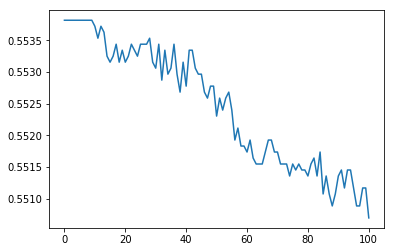

In [51]:
scores = [x[1] for x in gscv.grid_scores_]
#scores = np.array(scores).reshape(len(Cs), len(Gammas))
plt.plot(range(0,len(scores)), scores)
plt.show()

In [48]:
classifier = xgb.XGBClassifier(**get_xgb_params())
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=12, missing=None, n_estimators=221, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=0, subsample=1)

In [49]:
#classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
print confusion_matrix(y_pred=y_pred, y_true=y_test)
print f1_score(y_test, y_pred, average='weighted')
print accuracy_score(y_true=y_test, y_pred=y_pred)

[[ 854   24  622]
 [ 380   34  903]
 [ 388   27 1972]]
0.477419847086
0.549577248271


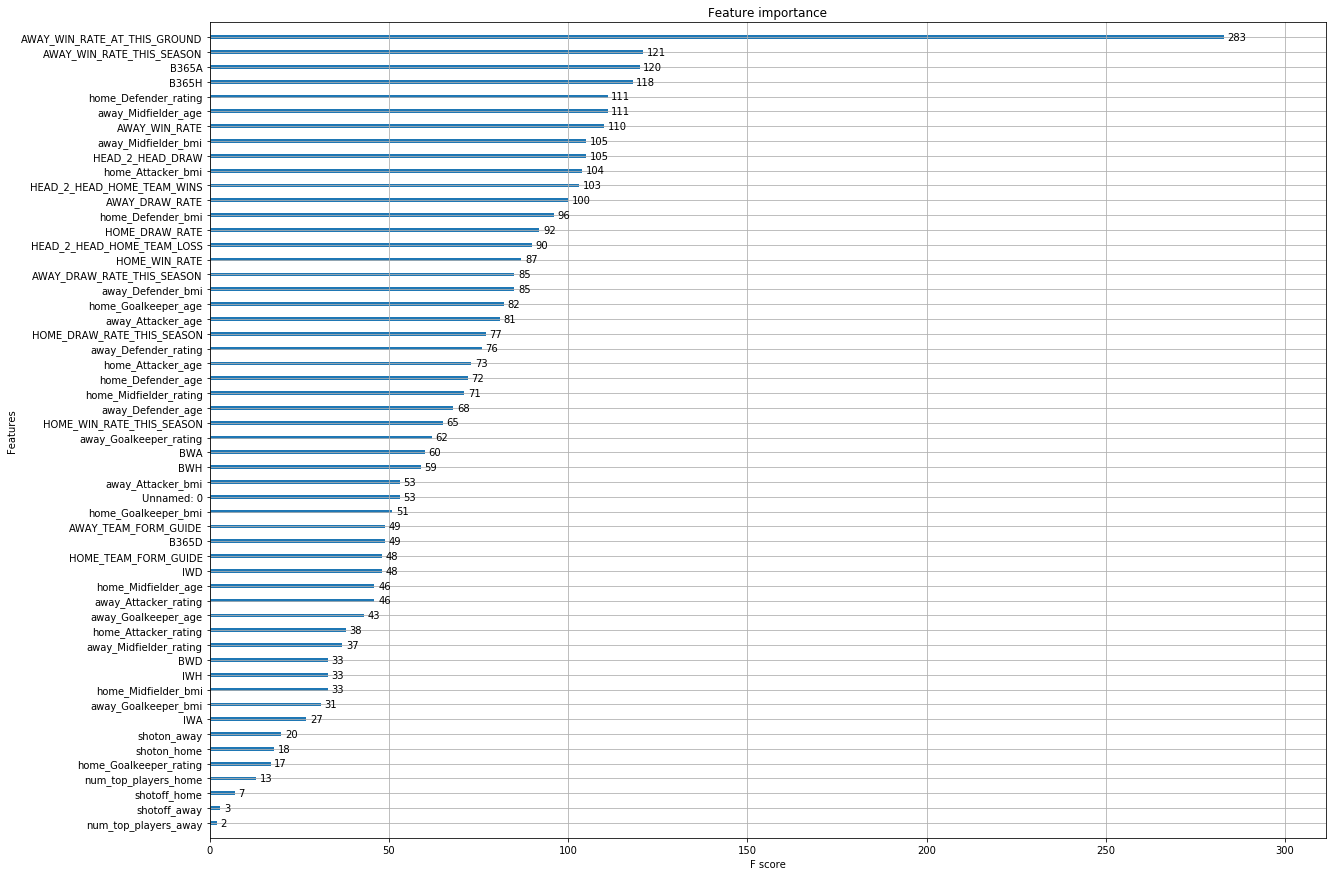

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
xgb.plot_importance(classifier, height=0.25, ax=ax)
plt.show()